In [1]:
!pip install Flair

# Tutorial 7: Training a Model

## A. Training a Text Classification Model

In [0]:
from flair.data import Corpus
from flair.datasets import TREC_6
from flair.embeddings import WordEmbeddings, FlairEmbeddings
from flair.embeddings import DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [3]:
# 1. get the corpus
corpus: Corpus = TREC_6()

2019-12-20 10:02:29,514 https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label not found in cache, downloading to /tmp/tmpwtsj73kn


100%|██████████| 335858/335858 [00:00<00:00, 828226.41B/s]

2019-12-20 10:02:30,265 copying /tmp/tmpwtsj73kn to cache at /root/.flair/datasets/trec_6/original/train_5500.label
2019-12-20 10:02:30,270 removing temp file /tmp/tmpwtsj73kn


2019-12-20 10:02:30,610 https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label not found in cache, downloading to /tmp/tmp_w_l43ft


100%|██████████| 23354/23354 [00:00<00:00, 284761.76B/s]

2019-12-20 10:02:31,035 copying /tmp/tmp_w_l43ft to cache at /root/.flair/datasets/trec_6/original/TREC_10.label
2019-12-20 10:02:31,036 removing temp file /tmp/tmp_w_l43ft
2019-12-20 10:02:31,050 Reading data from /root/.flair/datasets/trec_6
2019-12-20 10:02:31,051 Train: /root/.flair/datasets/trec_6/train.txt
2019-12-20 10:02:31,051 Dev: None
2019-12-20 10:02:31,053 Test: /root/.flair/datasets/trec_6/test.txt


In [4]:
# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),
                   FlairEmbeddings('news-forward'),
                   FlairEmbeddings('news-backward'),
                   ]

2019-12-20 10:03:51,881 Computing label dictionary. Progress:


100%|██████████| 4907/4907 [00:00<00:00, 240797.57it/s]

2019-12-20 10:03:51,940 [b'LOC', b'NUM', b'ENTY', b'DESC', b'HUM', b'ABBR']
2019-12-20 10:03:52,036 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpdsha9y7a



100%|██████████| 160000128/160000128 [00:02<00:00, 68410865.39B/s]

2019-12-20 10:03:54,559 copying /tmp/tmpdsha9y7a to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2019-12-20 10:03:54,825 removing temp file /tmp/tmpdsha9y7a
2019-12-20 10:03:55,296 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmpxdk29xpb


100%|██████████| 21494764/21494764 [00:00<00:00, 67154440.17B/s]

2019-12-20 10:03:55,780 copying /tmp/tmpxdk29xpb to cache at /root/.flair/embeddings/glove.gensim
2019-12-20 10:03:55,800 removing temp file /tmp/tmpxdk29xpb



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2019-12-20 10:03:57,884 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpy48896ne


100%|██████████| 73034624/73034624 [00:01<00:00, 56862612.96B/s]

2019-12-20 10:03:59,378 copying /tmp/tmpy48896ne to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2019-12-20 10:03:59,446 removing temp file /tmp/tmpy48896ne
2019-12-20 10:04:10,660 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpuj9gfg2o


100%|██████████| 73034575/73034575 [00:01<00:00, 64422695.84B/s]

2019-12-20 10:04:11,963 copying /tmp/tmpuj9gfg2o to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2019-12-20 10:04:12,029 removing temp file /tmp/tmpuj9gfg2o


In [0]:
# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default,
# to change use rnn_type parameter)

document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   hidden_size = 512,
                                                                   reproject_words = True,
                                                                   reproject_words_dimension = 256,
                                                                   )

In [0]:
# 5. create the text classifier
classifier = TextClassifier(document_embeddings,
                            label_dictionary = label_dict)

# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

In [7]:
# 7. start the training

trainer.train('resources/tagger/ag_news',
              learning_rate = 0.1,
              mini_batch_size = 32,
              anneal_factor = 0.5,
              patience = 5,
              max_epochs = 150)

2019-12-20 10:08:36,654 ----------------------------------------------------------------------------------------------------
2019-12-20 10:08:36,656 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=4196, out_features=256, bias=True)
    (rnn): GRU(256, 512, ba

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DocumentRNNEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FlairEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be

2019-12-20 10:09:13,530 ----------------------------------------------------------------------------------------------------
2019-12-20 10:09:13,581 epoch 2 - iter 0/154 - loss 1.63072765 - samples/sec: 10802.06
2019-12-20 10:09:14,150 epoch 2 - iter 15/154 - loss 1.40115912 - samples/sec: 869.09
2019-12-20 10:09:14,688 epoch 2 - iter 30/154 - loss 1.37406500 - samples/sec: 915.51
2019-12-20 10:09:15,214 epoch 2 - iter 45/154 - loss 1.35986563 - samples/sec: 940.17
2019-12-20 10:09:15,767 epoch 2 - iter 60/154 - loss 1.35646938 - samples/sec: 889.92
2019-12-20 10:09:16,313 epoch 2 - iter 75/154 - loss 1.34643362 - samples/sec: 908.97
2019-12-20 10:09:16,861 epoch 2 - iter 90/154 - loss 1.34063302 - samples/sec: 899.32
2019-12-20 10:09:17,387 epoch 2 - iter 105/154 - loss 1.33613134 - samples/sec: 937.70
2019-12-20 10:09:17,929 epoch 2 - iter 120/154 - loss 1.31926502 - samples/sec: 910.49
2019-12-20 10:09:18,456 epoch 2 - iter 135/154 - loss 1.30923989 - samples/sec: 942.43
2019-12-20 

{'test_score': 0.958,
 'dev_score_history': [0.3358,
  0.4844,
  0.556,
  0.5303,
  0.6165,
  0.7798,
  0.5872,
  0.7853,
  0.8165,
  0.7064,
  0.8514,
  0.8495,
  0.8147,
  0.7321,
  0.8752,
  0.633,
  0.8972,
  0.8587,
  0.8862,
  0.7798,
  0.9064,
  0.9101,
  0.8514,
  0.855,
  0.9064,
  0.8642,
  0.8862,
  0.9009,
  0.9156,
  0.9156,
  0.9174,
  0.8972,
  0.9174,
  0.9193,
  0.9211,
  0.9248,
  0.9321,
  0.9211,
  0.9193,
  0.9138,
  0.9193,
  0.9303,
  0.9284,
  0.9321,
  0.9303,
  0.9284,
  0.9321,
  0.9358,
  0.9229,
  0.9266,
  0.9376,
  0.9358,
  0.9321,
  0.9339,
  0.9303,
  0.9193,
  0.9284,
  0.9431,
  0.9358,
  0.9321,
  0.9394,
  0.9339,
  0.9321,
  0.9376,
  0.9358,
  0.9376,
  0.9376,
  0.9413,
  0.9376,
  0.9358,
  0.9376,
  0.9376,
  0.9376,
  0.9376,
  0.9303,
  0.9339,
  0.9376,
  0.9376,
  0.9358,
  0.9358,
  0.9358,
  0.9376,
  0.9376,
  0.9358,
  0.9376,
  0.9376,
  0.9394,
  0.9394,
  0.9376,
  0.9376,
  0.9394,
  0.9376,
  0.9376,
  0.9376,
  0.9376,
  0.9376,


Weights plots are saved in resources/tagger/ag_news/weights.png


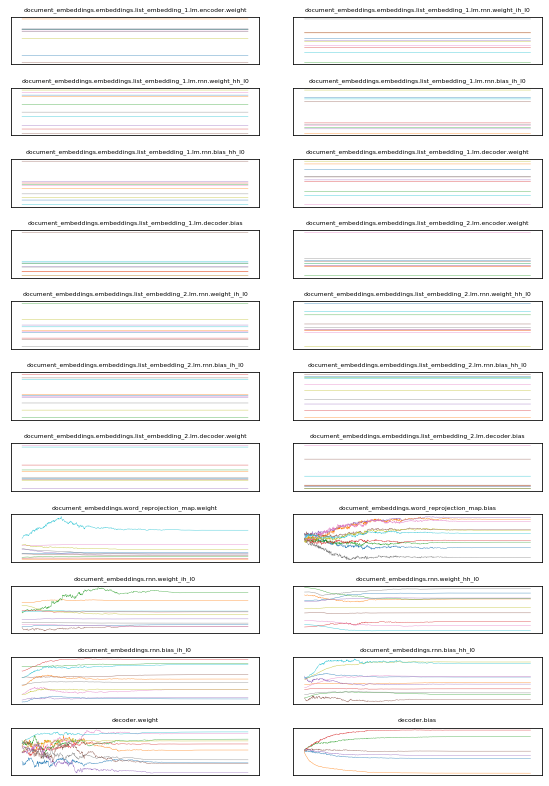

In [12]:
# 8. plot weight traces (optional)

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_weights('resources/tagger/ag_news/weights.txt')

In [14]:
from flair.data import Sentence

classifier = TextClassifier.load('resources/tagger/ag_news/best-model.pt')

# create example sentence
sentence = Sentence('France is the current world cup winner.')

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

2019-12-20 10:25:50,788 loading file resources/tagger/ag_news/best-model.pt
[NUM (0.8993986248970032)]


## B. Multi-Dataset Training

In [0]:
from typing import List
from flair.data import MultiCorpus
from flair.datasets import UD_ENGLISH, UD_GERMAN
from flair.embeddings import FlairEmbeddings, TokenEmbeddings
from flair.embeddings import StackedEmbeddings
from flair.training_utils import EvaluationMetric

In [16]:
# 1. get the corpora - English and German UD

corpus: MultiCorpus = MultiCorpus([UD_ENGLISH(), UD_GERMAN()]).downsample(0.1)

2019-12-20 10:28:49,955 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-dev.conllu not found in cache, downloading to /tmp/tmp8qbi4rvj


1668224B [00:00, 81161784.41B/s]         

2019-12-20 10:28:50,010 copying /tmp/tmp8qbi4rvj to cache at /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2019-12-20 10:28:50,013 removing temp file /tmp/tmp8qbi4rvj


2019-12-20 10:28:50,467 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu not found in cache, downloading to /tmp/tmpfjv_k0o3


1662046B [00:00, 74138832.96B/s]         

2019-12-20 10:28:50,522 copying /tmp/tmpfjv_k0o3 to cache at /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2019-12-20 10:28:50,526 removing temp file /tmp/tmpfjv_k0o3


2019-12-20 10:28:51,804 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu not found in cache, downloading to /tmp/tmp3tsypmpb


13303560B [00:00, 121538497.39B/s]

2019-12-20 10:28:51,947 copying /tmp/tmp3tsypmpb to cache at /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2019-12-20 10:28:51,965 removing temp file /tmp/tmp3tsypmpb


2019-12-20 10:28:52,302 Reading data from /root/.flair/datasets/ud_english
2019-12-20 10:28:52,302 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2019-12-20 10:28:52,303 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2019-12-20 10:28:52,308 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2019-12-20 10:28:58,564 https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-dev.conllu not found in cache, downloading to /tmp/tmpjye0_yqy


882822B [00:00, 65446354.52B/s]          

2019-12-20 10:28:58,610 copying /tmp/tmpjye0_yqy to cache at /root/.flair/datasets/ud_german/de_gsd-ud-dev.conllu
2019-12-20 10:28:58,613 removing temp file /tmp/tmpjye0_yqy


2019-12-20 10:28:58,953 https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-test.conllu not found in cache, downloading to /tmp/tmpq5i6o31q


1177197B [00:00, 75082831.55B/s]         

2019-12-20 10:28:59,000 copying /tmp/tmpq5i6o31q to cache at /root/.flair/datasets/ud_german/de_gsd-ud-test.conllu
2019-12-20 10:28:59,004 removing temp file /tmp/tmpq5i6o31q


2019-12-20 10:29:00,312 https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-train.conllu not found in cache, downloading to /tmp/tmp6ne8a96p


18886219B [00:00, 127353957.93B/s]

2019-12-20 10:29:00,508 copying /tmp/tmp6ne8a96p to cache at /root/.flair/datasets/ud_german/de_gsd-ud-train.conllu
2019-12-20 10:29:00,529 removing temp file /tmp/tmp6ne8a96p


2019-12-20 10:29:01,029 Reading data from /root/.flair/datasets/ud_german
2019-12-20 10:29:01,030 Train: /root/.flair/datasets/ud_german/de_gsd-ud-train.conllu
2019-12-20 10:29:01,033 Test: /root/.flair/datasets/ud_german/de_gsd-ud-test.conllu
2019-12-20 10:29:01,035 Dev: /root/.flair/datasets/ud_german/de_gsd-ud-dev.conllu


In [17]:
# 2. what tag do we want to predict?
tag_type = 'upos'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type = tag_type)
print(tag_dictionary.idx2item)

[b'<unk>', b'O', b'PRON', b'ADJ', b'AUX', b'VERB', b'ADP', b'PUNCT', b'ADV', b'CCONJ', b'PART', b'PROPN', b'NUM', b'DET', b'NOUN', b'SCONJ', b'SYM', b'X', b'INTJ', b'<START>', b'<STOP>']


In [18]:
# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [
            # we use multilingual Flair embeddings in this task
            FlairEmbeddings('multi-forward'),
            FlairEmbeddings('multi-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings = embedding_types)

2019-12-20 10:32:06,530 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.3/lm-jw300-forward-v0.1.pt not found in cache, downloading to /tmp/tmpbx_tw_sr


100%|██████████| 172513724/172513724 [00:01<00:00, 86554145.89B/s]

2019-12-20 10:32:08,709 copying /tmp/tmpbx_tw_sr to cache at /root/.flair/embeddings/lm-jw300-forward-v0.1.pt


2019-12-20 10:32:09,122 removing temp file /tmp/tmpbx_tw_sr
2019-12-20 10:32:11,034 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.3/lm-jw300-backward-v0.1.pt not found in cache, downloading to /tmp/tmpols8lb_u


100%|██████████| 172513724/172513724 [00:02<00:00, 74201534.54B/s]

2019-12-20 10:32:13,549 copying /tmp/tmpols8lb_u to cache at /root/.flair/embeddings/lm-jw300-backward-v0.1.pt


2019-12-20 10:32:13,913 removing temp file /tmp/tmpols8lb_u


In [0]:
# 5. initialize sequence tagger

from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size = 256,
                                        embeddings = embeddings,
                                        tag_dictionary = tag_dictionary,
                                        tag_type = tag_type,
                                        use_crf = True)

In [20]:
# 6. initialize trainer

from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# 7. start training

trainer.train('resources/taggers/example-universal-pos',
              learning_rate = 0.1,
              mini_batch_size = 32,
              max_epochs = 150,)

2019-12-20 10:34:58,067 ----------------------------------------------------------------------------------------------------
2019-12-20 10:34:58,073 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(11854, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=11854, bias=True)
      )
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(11854, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=11854, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4096, out_features=4096, bias=True)
  (rnn): LSTM(4096, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_f

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FlairEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LanguageModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr

2019-12-20 10:36:13,863 ----------------------------------------------------------------------------------------------------
2019-12-20 10:36:14,142 epoch 2 - iter 0/83 - loss 18.27656746 - samples/sec: 931.55
2019-12-20 10:36:15,834 epoch 2 - iter 8/83 - loss 17.09182252 - samples/sec: 155.91
2019-12-20 10:36:17,348 epoch 2 - iter 16/83 - loss 17.37812065 - samples/sec: 171.35
2019-12-20 10:36:18,648 epoch 2 - iter 24/83 - loss 16.43968861 - samples/sec: 200.23
2019-12-20 10:36:20,101 epoch 2 - iter 32/83 - loss 16.02409054 - samples/sec: 178.29
2019-12-20 10:36:21,477 epoch 2 - iter 40/83 - loss 15.62083384 - samples/sec: 188.76
2019-12-20 10:36:22,955 epoch 2 - iter 48/83 - loss 15.34706361 - samples/sec: 175.42
2019-12-20 10:36:24,530 epoch 2 - iter 56/83 - loss 15.01506966 - samples/sec: 164.50
2019-12-20 10:36:26,048 epoch 2 - iter 64/83 - loss 14.88080632 - samples/sec: 170.90
2019-12-20 10:36:27,644 epoch 2 - iter 72/83 - loss 14.68894113 - samples/sec: 162.41
2019-12-20 10:36:

{'test_score': 0.9175,
 'dev_score_history': [0.7225,
  0.7895,
  0.8345,
  0.8458,
  0.842,
  0.8703,
  0.8631,
  0.8776,
  0.8758,
  0.877,
  0.8819,
  0.8764,
  0.8796,
  0.8894,
  0.8952,
  0.894,
  0.8923,
  0.8946,
  0.8984,
  0.8885,
  0.8937,
  0.8963,
  0.9007,
  0.9024,
  0.9012,
  0.9033,
  0.9059,
  0.8981,
  0.905,
  0.9047,
  0.9004,
  0.9102,
  0.9056,
  0.9064,
  0.9059,
  0.9079,
  0.9105,
  0.9082,
  0.909,
  0.907,
  0.9122,
  0.9108,
  0.9093,
  0.9111,
  0.9148,
  0.9128,
  0.9111,
  0.9131,
  0.9111,
  0.9111,
  0.9108,
  0.9122,
  0.9125,
  0.9119,
  0.9119,
  0.9116,
  0.9108,
  0.9105,
  0.9105,
  0.9111,
  0.9108,
  0.9122,
  0.9113,
  0.9105,
  0.9108,
  0.9105,
  0.9108,
  0.9111,
  0.9108,
  0.9111,
  0.9111,
  0.9111,
  0.9111,
  0.9108,
  0.9111,
  0.9105,
  0.9105],
 'train_loss_history': [29.416899991322712,
  14.541617221142872,
  11.568042192114405,
  10.18543615685888,
  9.409052222608084,
  8.744065669645746,
  8.242865177522223,
  7.902512021811612

### B1. Plotting Training Curves and Weights

In [0]:
from flair.visual.training_curves import Plotter

plotter = Plotter()
# plotter.plot_training_curves('resources/taggers/example-universal-pos/loss.tsv')
# plotter.plot_weights('resources/taggers/example-universal-pos/weights.txt')

## C. Resuming Training

In [0]:
from flair.data import Sentence, Corpus
from flair.datasets import WNUT_17
from flair.embeddings import TokenEmbeddings, WordEmbeddings
from flair.embeddings import StackedEmbeddings
from typing import List

In [26]:
# 1. get the corpus

corpus: Corpus = WNUT_17().downsample(0.1)

2019-12-20 11:06:09,904 https://noisy-text.github.io/2017/files/wnut17train.conll not found in cache, downloading to /tmp/tmphaw5g42p


100%|██████████| 493781/493781 [00:00<00:00, 14362565.78B/s]

2019-12-20 11:06:09,975 copying /tmp/tmphaw5g42p to cache at /root/.flair/datasets/wnut_17/wnut17train.conll
2019-12-20 11:06:09,978 removing temp file /tmp/tmphaw5g42p
2019-12-20 11:06:10,105 https://noisy-text.github.io/2017/files/emerging.dev.conll not found in cache, downloading to /tmp/tmpv704v7em



100%|██████████| 114752/114752 [00:00<00:00, 8472929.72B/s]

2019-12-20 11:06:10,150 copying /tmp/tmpv704v7em to cache at /root/.flair/datasets/wnut_17/emerging.dev.conll
2019-12-20 11:06:10,151 removing temp file /tmp/tmpv704v7em


2019-12-20 11:06:10,364 https://noisy-text.github.io/2017/files/emerging.test.annotated not found in cache, downloading to /tmp/tmpsv2gz32e


100%|██████████| 192425/192425 [00:00<00:00, 14959943.41B/s]

2019-12-20 11:06:10,408 copying /tmp/tmpsv2gz32e to cache at /root/.flair/datasets/wnut_17/emerging.test.annotated
2019-12-20 11:06:10,409 removing temp file /tmp/tmpsv2gz32e
2019-12-20 11:06:10,411 Reading data from /root/.flair/datasets/wnut_17
2019-12-20 11:06:10,412 Train: /root/.flair/datasets/wnut_17/wnut17train.conll
2019-12-20 11:06:10,414 Dev: /root/.flair/datasets/wnut_17/emerging.dev.conll
2019-12-20 11:06:10,415 Test: /root/.flair/datasets/wnut_17/emerging.test.annotated


In [0]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type = tag_type)

In [28]:
# 4. initialize embeddings

embedding_types: List[TokenEmbeddings] = [
                WordEmbeddings('glove')
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings = embedding_types)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# 5. initialize sequence tagger

from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size = 256,
                                        embeddings = embeddings,
                                        tag_dictionary = tag_dictionary,
                                        tag_type = tag_type,
                                        use_crf = True)

In [0]:
# 6. initialize trainer

from flair.trainers import ModelTrainer
from flair.training_utils import EvaluationMetric

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [31]:
# 7. start training

trainer.train('resources/taggers/example-ner',
              learning_rate = 0.1,
              mini_batch_size = 32,
              max_epochs = 150,
              checkpoint = True)

2019-12-20 11:10:57,698 ----------------------------------------------------------------------------------------------------
2019-12-20 11:10:57,702 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=28, bias=True)
)"
2019-12-20 11:10:57,703 ----------------------------------------------------------------------------------------------------
2019-12-20 11:10:57,705 Corpus: "Corpus: 339 train + 101 dev + 129 test sentences"
2019-12-20 11:10:57,705 ----------------------------------------------------------------------------------------------------
2019-12-20 11:10:57,707 Parameters:
2019-12-20 11:10:57,708  - learning_rate: "0.1"
2019-12-20 11:10:57,709  - mini_batch_size: 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SequenceTagger. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordDropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


2019-12-20 11:11:10,159 ----------------------------------------------------------------------------------------------------
2019-12-20 11:11:10,292 epoch 2 - iter 0/11 - loss 12.04873848 - samples/sec: 251.62
2019-12-20 11:11:10,420 epoch 2 - iter 1/11 - loss 11.55122328 - samples/sec: 275.94
2019-12-20 11:11:10,537 epoch 2 - iter 2/11 - loss 9.39491049 - samples/sec: 296.75
2019-12-20 11:11:10,669 epoch 2 - iter 3/11 - loss 8.10245109 - samples/sec: 264.65
2019-12-20 11:11:10,783 epoch 2 - iter 4/11 - loss 7.77407551 - samples/sec: 305.72
2019-12-20 11:11:10,895 epoch 2 - iter 5/11 - loss 7.29443105 - samples/sec: 314.84
2019-12-20 11:11:11,003 epoch 2 - iter 6/11 - loss 7.26372113 - samples/sec: 322.90
2019-12-20 11:11:11,109 epoch 2 - iter 7/11 - loss 6.91480714 - samples/sec: 333.52
2019-12-20 11:11:11,213 epoch 2 - iter 8/11 - loss 6.95603100 - samples/sec: 340.11
2019-12-20 11:11:11,327 epoch 2 - iter 9/11 - loss 7.37227788 - samples/sec: 305.65
2019-12-20 11:11:11,424 epoch 2 -

KeyboardInterrupt: ignored

In [0]:
# 8. stop training at any point

# 9. continue trainer at later point

from pathlib import Path

checkpoint = 'resources/taggers/example-ner/checkpoint.pt'
# trainer = ModelTrainer.load_checkpoint(checkpoint, corpus)
# trainer.train('resources/taggers/example-ner',
#               learning_rate = 0.1,
#               mini_batch_size = 32,
#               max_epochs = 150,
#               checkpoint = True)